In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
cancer = load_breast_cancer()

# Univariate Stats

- `f_classif`
- `f_regression`
- `SelectKBest`
- `SelectPercentile`

In [3]:
noise = np.random.normal(size = (len(cancer.data), 50))

In [4]:
X_w_noise = np.hstack([cancer.data, noise])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, test_size = 0.5)

In [6]:
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)

SelectPercentile(percentile=50,
         score_func=<function f_classif at 0x1a13629400>)

In [7]:
#transform training
X_train_selected = select.transform(X_train)

In [8]:
X_train.shape

(284, 80)

In [9]:
X_train_selected.shape

(284, 40)

In [10]:
mask = select.get_support()

In [11]:
print(mask)

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True False False False False  True False
 False False False False  True False  True  True  True False False  True
  True False False False False False False False False False  True  True
 False False  True False False False False False False False  True False
 False False False False  True False  True False]


Text(0.5, 0, 'Sample index')

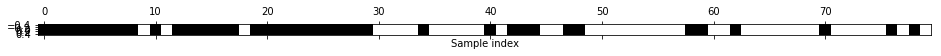

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
#black is true 
plt.matshow(mask.reshape(1, -1), cmap = 'gray_r')
plt.xlabel('Sample index')

### Compare performance

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
X_test_selected = select.transform(X_test)

In [15]:
lr = LogisticRegression()

In [16]:
lr.fit(X_train, y_train)

/Users/michaele/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
#all features
lr.score(X_test, y_test)

0.8807017543859649

In [18]:
lr = LogisticRegression()
lr.fit(X_train_selected, y_train)

/Users/michaele/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [19]:
#selected features
lr.score(X_train_selected, y_train)

0.9753521126760564

In [20]:
lr.score(X_test_selected, y_test)

0.9228070175438596

In [21]:
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [22]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [23]:
import pandas as pd

In [24]:
sex_dum = pd.get_dummies(titanic.sex, drop_first=True)

In [25]:
sex_dum.head()

,male
0,1
1,0
2,0
3,0
4,1


In [26]:
titanic['sex_dum'] = sex_dum

In [27]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,sex_dum
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1


In [28]:
titanic = titanic.dropna()
X = titanic[['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_dum']]
y = titanic.survived
select.fit(X, y)

SelectPercentile(percentile=50,
         score_func=<function f_classif at 0x1a13629400>)

In [29]:
select.get_support()

array([False,  True, False, False,  True,  True])

In [30]:
mask = select.get_support()

Text(0.5, 0, 'Sample index')

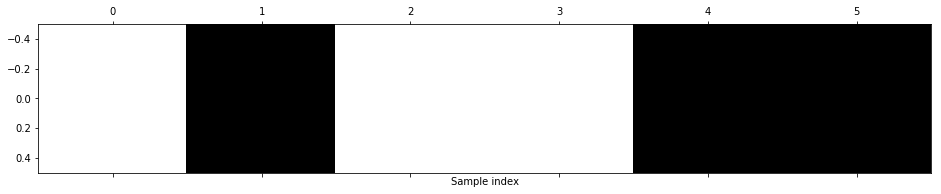

In [31]:
plt.matshow(mask.reshape(1, -1), cmap = 'gray_r')
plt.xlabel('Sample index')

### Model Based Selection

In [ ]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
select = SelectFromModel(RandomForestClassifier(n_estimators = 100), threshold = 'median')

In [ ]:
select.fit(X_train, y_train)

In [ ]:
X_train_l1 = select.transform(X_train)

In [ ]:
X_train.shape

In [ ]:
X_train_l1.shape

In [ ]:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap = 'gray_r')
plt.xlabel("Sample Index")

In [ ]:
#performance
X_test_l1 = select.transform(X_test)

In [ ]:
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)

In [ ]:
score

### Iterative Feature Selection

In [ ]:
from sklearn.feature_selection import RFE


In [ ]:
select = RFE(RandomForestClassifier(n_estimators = 100), n_features_to_select=40)

In [ ]:
select.fit(X_train, y_train)

In [ ]:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap = 'gray_r')

In [ ]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

In [ ]:
score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)

In [ ]:
score

In [ ]:
#use model from selections
select.score(X_test, y_test)

In [ ]:
from sklearn.datasets import load_wine

In [ ]:
wine = load_wine()

In [ ]:
print(wine.DESCR)

In [ ]:
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)

In [ ]:
wine_df.head()

In [ ]:
select = RFE(RandomForestClassifier(n_estimators = 100), n_features_to_select=6)

In [ ]:
select.fit(wine.data, wine.target)

In [ ]:
select.get_support()

In [ ]:
from sklearn.pipeline import make_pipeline

In [ ]:
pipe = make_pipeline(select, LogisticRegression())

In [ ]:
pipe.fit(wine.data, wine.target)

In [ ]:
pipe.named_steps

In [ ]:
pipe.named_steps.rfe.get_support()